<a href="https://colab.research.google.com/github/Taylor-britt/Project-3-Deep-Wide-Nets-RNNs-Kernels-Regressions/blob/main/Project_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q scikit-learn pandas
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

# Features (X)
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Numeric target (0,1,2)
y = pd.Series(iris.target, name="target")

# Map numeric target -> species names (setosa, versicolor, virginica)
id_to_name = {i: name for i, name in enumerate(iris.target_names)}
species = y.map(id_to_name).rename("species")

# Combine into one DataFrame with readable species names
df = pd.concat([X, species], axis=1)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Iris Dataset (scikit-learn / UCI)

**What is it?**  
A table about different flowers. Each row = one flower. Each column = a measurement of the petals or sepals (length and width).

**Source:**  
Built into scikit-learn (originally from the UCI Machine Learning Repository).

**How big is it?**  
**Samples (rows):** 150 flowers  
**Features (columns):** 4 measurements (sepal length, sepal width, petal length, petal width)

**Class labels (for checking only, not for clustering):**  
There are **3 flower species**:  
Setosa
Versicolor  
Virginica
We don’t use these labels for clustering, only to see how good the clusters are.

**Scaling/Normalization:**  
We use **StandardScaler** to make all features “fair” (so one measurement doesn’t overpower another).

**Cluster shape note:**  
Iris has **compact Gaussian-like clusters**, which means the flower groups are usually round and tidy in shape.

**How we’ll see the shapes:**  **bold text**
We’ll make a **2D PCA scatterplot** (and can try **t-SN**


In [ ]:
df["species"].value_counts()


,count
species,
setosa,50
versicolor,50
virginica,50


In [ ]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="target")
id_to_name = {i: name for i, name in enumerate(iris.target_names)}
species = y.map(id_to_name).rename("species")
df = pd.concat([X, species], axis=1)
display(df.head()) # Display the head of the dataframe
display(df['species'].value_counts()) # Get value counts of the 'species' column

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,count
species,
setosa,50
versicolor,50
virginica,50


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

df_scaled = pd.concat([X_scaled, species], axis=1)
df_scaled.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa


In [ ]:
df.to_csv("iris.csv", index=False)
df_scaled.to_csv("iris_scaled.csv", index=False)


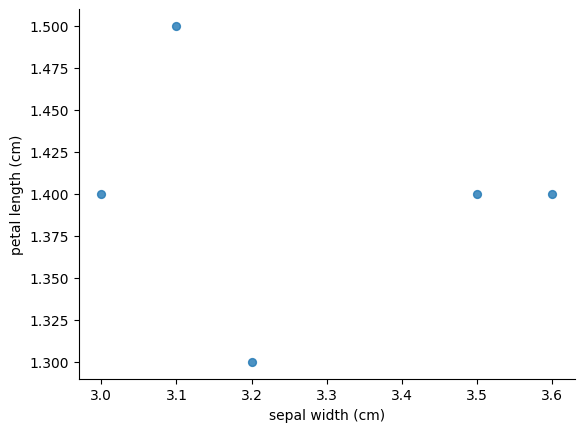

In [ ]:
from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='sepal width (cm)', y='petal length (cm)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

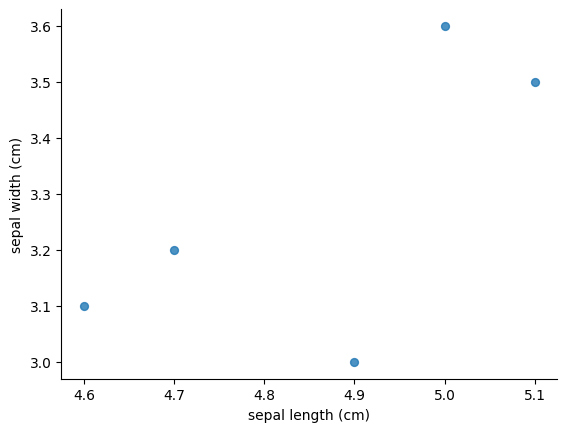

In [ ]:
from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

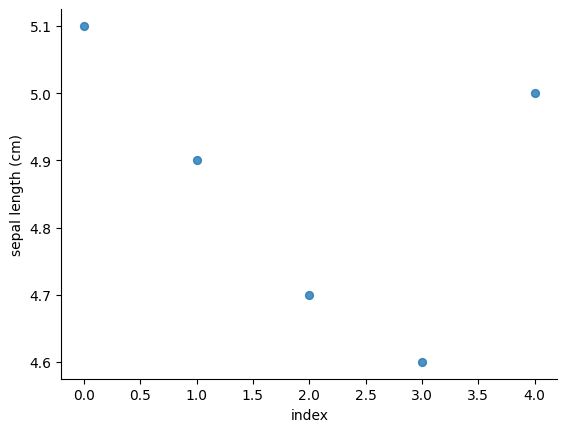

In [ ]:
from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='index', y='sepal length (cm)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from sklearn import datasets
wine = datasets.load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

cancer = datasets.load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target

digits = datasets.load_digits()
digits_df = pd.DataFrame(digits.data, columns=digits.feature_names)
digits_df['target'] = digits.target

In [ ]:
wine = datasets.load_wine() #load dataset
x = pd.DataFrame(wine.data, columns=wine.feature_names) #dataframe
y = pd.Series(wine.target, name="target") #target series
wine_df_combined = pd.concat([x , y], axis=1)
display(wine_df_combined.head())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### 🍇 Wine Dataset (from scikit-learn / UCI)

**What is it?**  
A table about different wines. Each row = one wine bottle. Each column = a measurement (alcohol, color, ..). use it to see if wines form groups (clusters).

**Source:**  
Built into scikit-learn  from the UCI Machine Learning Repository.

**How big is it?**  
- **Samples (rows):** 178 wines  
- **Features (columns):** 13 numeric measurements (e.g., alcohol, malic acid, ash, magnesium, color intensity, etc.)

**Labels (for checking only, not for clustering):**  
There are **3 wine types** (0, 1, 2). We don’t use these to make the clusters; we only peek at them later to see how good our clusters are.

**Do we scale/normalize?**  
Yes. We use **StandardScaler** so all features are “fair” (mean = 0, std = 1). This helps distance-based methods and PCA/t-SNE.

**What shape are the clusters?**  
Features can be **skewed** and some clusters can **overlap**. That’s okay—we’ll still look at shapes with a 2D picture.

**How do we show the shapes?**  
We’ll make a **2D PCA scatterplot** (and can try **t-SNE** too) to see dots in two dimensions.  
*(The picture will be made in a code cell right below this text.)*


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

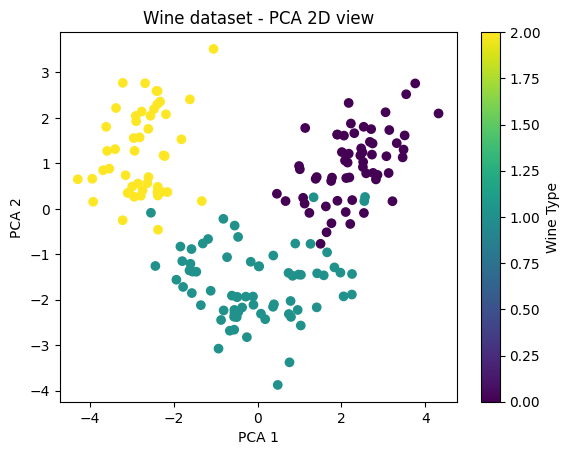

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="viridis")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Wine dataset - PCA 2D view")
plt.colorbar(label="Wine Type")
plt.show()

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# load dataset
cancer = load_breast_cancer()

# make a table (dataframe)
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)

# target column (0 = malignant, 1 = benign)
y = pd.Series(cancer.target, name="target")

# combine into one table
df = pd.concat([X, y], axis=1)

# show first rows
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


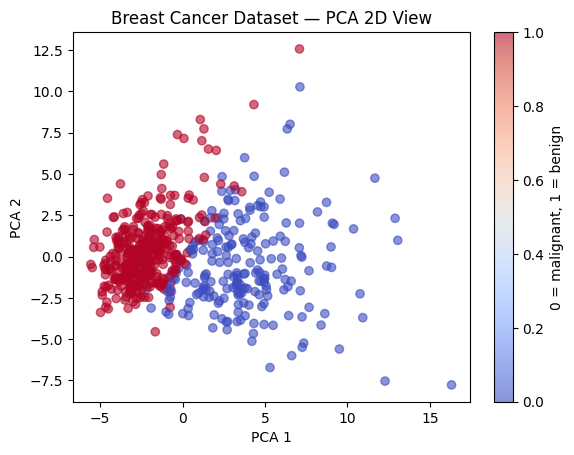

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="coolwarm", alpha=0.6)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Breast Cancer Dataset — PCA 2D View")
plt.colorbar(label="0 = malignant, 1 = benign")
plt.show()


###  Breast Cancer Dataset (scikit-learn / UCI)

**What is it?
A table about breast cancer tumors. Each row = one patient’s tumor sample. Each column = a measurement of the tumor cell nuclei (like radius, texture, smoothness).

**Source:
Built into scikit-learn (originally from the UCI Machine Learning Repository).

**How big is it?
- **Samples (rows):** 569  
- **Features (columns):** 30 numeric measurements

**Class labels
0 = Malignant (cancerous)  
1 = Benign (non-cancerous)

**Scaling/Normalization:
We use **StandardScaler** so all measurements are fair before clustering.

**Cluster shape note:
This dataset has **non-spherical clusters with varying density**, so clusters may not be nice and round.

**How we’ll see the shapes:
We use **2D PCA scatterplot** (or t-SNE) to show the data in two dimensions.  
bold text

In [ ]:
from sklearn.datasets import load_digits
import pandas as pd

# load dataset
digits = load_digits()

# features = pixel values (64 per image: 8x8)
X = pd.DataFrame(digits.data)

# target = which digit (0–9)
y = pd.Series(digits.target, name="digit")

# combine into one dataframe
df = pd.concat([X, y], axis=1)

# show first rows
df.head()


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,digit
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


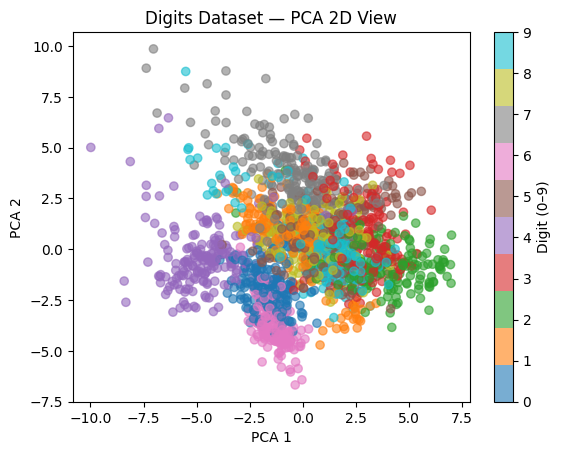

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="tab10", alpha=0.6)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Digits Dataset — PCA 2D View")
plt.colorbar(label="Digit (0–9)")
plt.show()


#Digits Dataset (scikit-learn)
**What is it?
Images of handwritten digits (0–9). Each row = one image. Each column = one pixel value from the 8x8 image.

**Source:
Built into scikit-learn (originally from the UCI Machine Learning Repository).

**How big is it?
- **Samples (rows): 1,797 handwritten digit images  
- **Features (columns):64 pixel values (8 × 8 images)

**Class labels
Digits 0 through 9 (10 classes). These are used for evaluation only.

**Scaling/Normalization:
We use **StandardScaler** to make pixel features fair before clustering.

**Cluster shape note:
Digits are **high-dimensional** and form **non-convex clusters**. This means the clusters are not round and can twist or overlap.

**How we’ll see the shapes:
We’ll use a **2D PCA scatterplot** (and can also try **t-SNE**) to project the high-dimensional data into two dimensions for visualization.


In [5]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_digits
import pandas as pd

# Load and prepare Iris data
iris = load_iris()
X_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
y_iris = pd.Series(iris.target, name="target")
id_to_name_iris = {i: name for i, name in enumerate(iris.target_names)}
species_iris = y_iris.map(id_to_name_iris).rename("species")
df_iris = pd.concat([X_iris, species_iris], axis=1)

# Load and prepare Wine data
wine = load_wine()
X_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
y_wine = pd.Series(wine.target, name="target")
wine_df_combined = pd.concat([X_wine , y_wine], axis=1)

# Load and prepare Breast Cancer data
cancer = load_breast_cancer()
X_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y_cancer = pd.Series(cancer.target, name="target")
cancer_df = pd.concat([X_cancer, y_cancer], axis=1)

# Load and prepare Digits data
digits = load_digits()
X_digits = pd.DataFrame(digits.data, columns=digits.feature_names)
y_digits = pd.Series(digits.target, name="target")
digits_df = pd.concat([X_digits, y_digits], axis=1)


datasets = {
    "iris": (df_iris.drop(columns="species"), y_iris),
    "wine": (wine_df_combined.drop(columns="target"), wine_df_combined["target"]),
    "breast_cancer": (cancer_df.drop(columns="target"), cancer_df["target"]),
    "digits": (digits_df.drop(columns="target"), digits_df["target"])
}


=== IRIS ===


,dataset,algorithm,params,inertia,silhouette,ARI,runtime_s,iterations,dbscan_core_samples
5,iris,Agglomerative-complete,k=3,sepal length (cm) 170.461979 sepal width (...,0.513595,0.642251,0.017747,NaN,NaN
4,iris,Agglomerative-ward,k=3,sepal length (cm) 213.061817 sepal width (...,0.554324,0.731199,0.093883,NaN,NaN
2,iris,Bisecting-KMeans,k=3,sepal length (cm) 208.779579 sepal width (...,0.540521,0.680872,0.035535,7.0,NaN
3,iris,DBSCAN,"{'eps': 0.6, 'min_samples': 5}",NaN,0.538173,0.536997,0.023791,NaN,132.0
1,iris,KMeans++,k=3,78.851441,0.552819,0.730238,0.018759,4.0,NaN
0,iris,KMeans-random,k=3,78.851441,0.552819,0.730238,0.019594,6.0,NaN


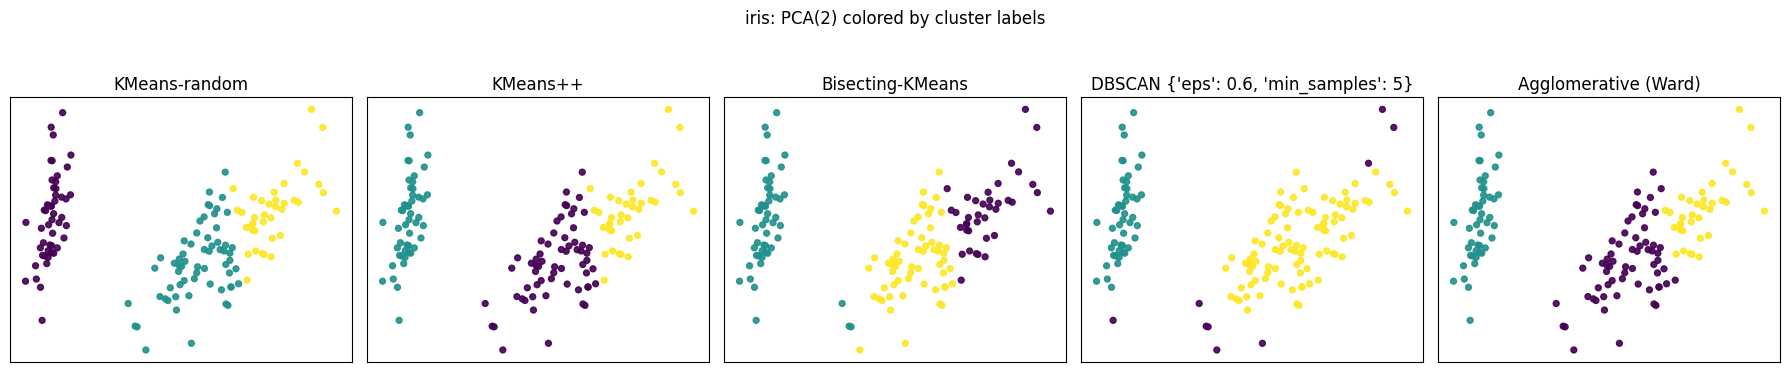


=== WINE ===


,dataset,algorithm,params,inertia,silhouette,ARI,runtime_s,iterations,dbscan_core_samples
5,wine,Agglomerative-complete,k=3,alcohol 4.375891e+01 m...,0.541897,0.370833,0.008641,NaN,NaN
4,wine,Agglomerative-ward,k=3,alcohol 4.597976e+01 m...,0.564480,0.368402,0.009669,NaN,NaN
2,wine,Bisecting-KMeans,k=3,alcohol 2.114775e+02 m...,0.548167,0.399222,0.036644,10.0,NaN
3,wine,DBSCAN,"{'eps': 1.2, 'min_samples': 6}",NaN,NaN,0.000000,0.018562,NaN,0.0
1,wine,KMeans++,k=3,2370689.686783,0.571138,0.371114,0.023563,6.0,NaN
0,wine,KMeans-random,k=3,2370689.686783,0.571138,0.371114,0.030830,11.0,NaN


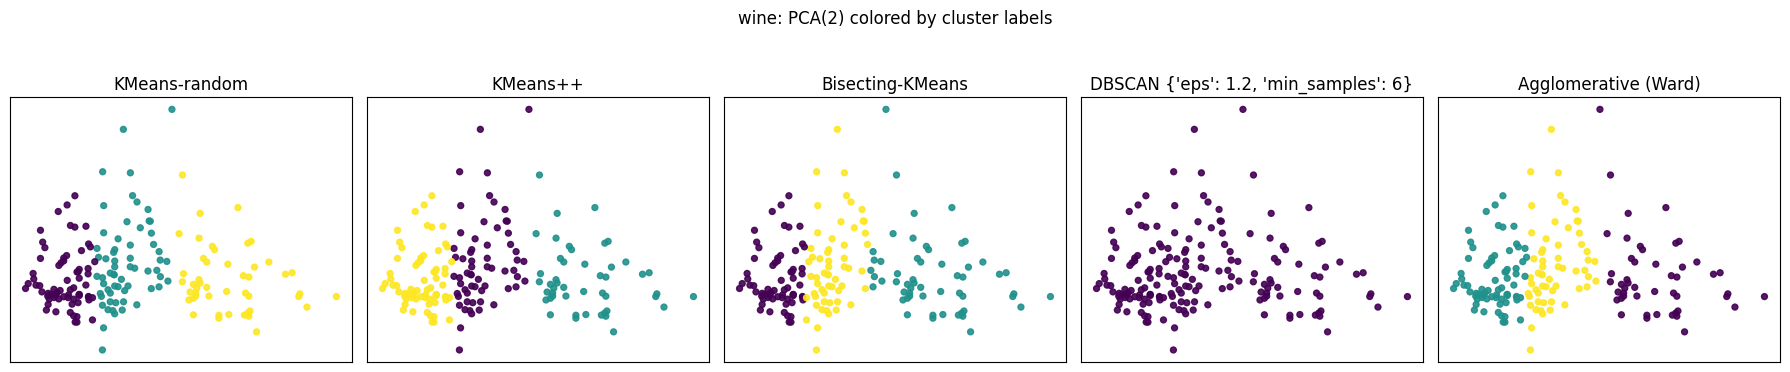


=== BREAST_CANCER ===


,dataset,algorithm,params,inertia,silhouette,ARI,runtime_s,iterations,dbscan_core_samples
5,breast_cancer,Agglomerative-complete,k=2,mean radius 2.582387e+04 mean t...,0.690935,0.052305,0.035282,NaN,NaN
4,breast_cancer,Agglomerative-ward,k=2,mean radius 1.201167e+04 mean t...,0.689980,0.287246,0.035229,NaN,NaN
2,breast_cancer,Bisecting-KMeans,k=2,mean radius 1.311753e+04 mean t...,0.697265,0.491425,0.040961,8.0,NaN
3,breast_cancer,DBSCAN,"{'eps': 1.3, 'min_samples': 5}",NaN,NaN,0.000000,0.009752,NaN,0.0
1,breast_cancer,KMeans++,k=2,77943099.878299,0.697265,0.491425,0.030826,6.0,NaN
0,breast_cancer,KMeans-random,k=2,77943099.878299,0.697265,0.491425,0.045108,6.0,NaN


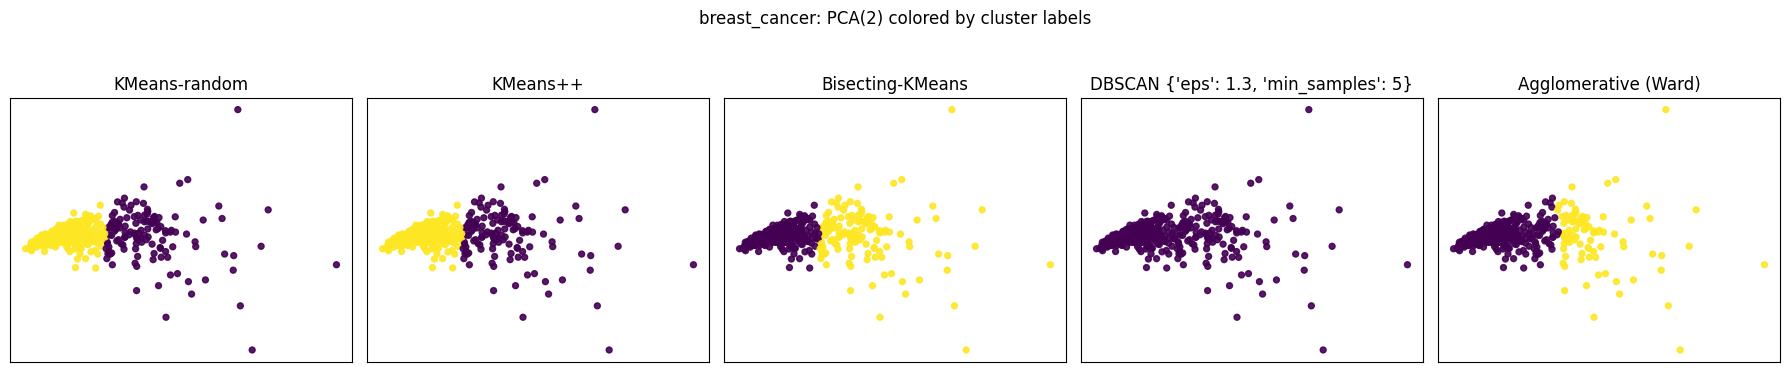


=== DIGITS ===


,dataset,algorithm,params,inertia,silhouette,ARI,runtime_s,iterations,dbscan_core_samples
5,digits,Agglomerative-complete,k=10,pixel_0_0 0.000000 pixel_0_1 363.3...,0.119271,0.428689,0.255550,NaN,NaN
4,digits,Agglomerative-ward,k=10,pixel_0_0 0.000000 pixel_0_1 377.0...,0.178497,0.794003,0.260374,NaN,NaN
2,digits,Bisecting-KMeans,k=10,pixel_0_0 0.000000 pixel_0_1 397...,0.166742,0.624592,0.323005,81.0,NaN
3,digits,DBSCAN,"{'eps': 2.0, 'min_samples': 5}",NaN,NaN,0.000000,0.061280,NaN,0.0
1,digits,KMeans++,k=10,1165256.299507,0.182385,0.666912,0.210407,11.0,NaN
0,digits,KMeans-random,k=10,1165296.614271,0.182236,0.663415,0.201694,13.0,NaN


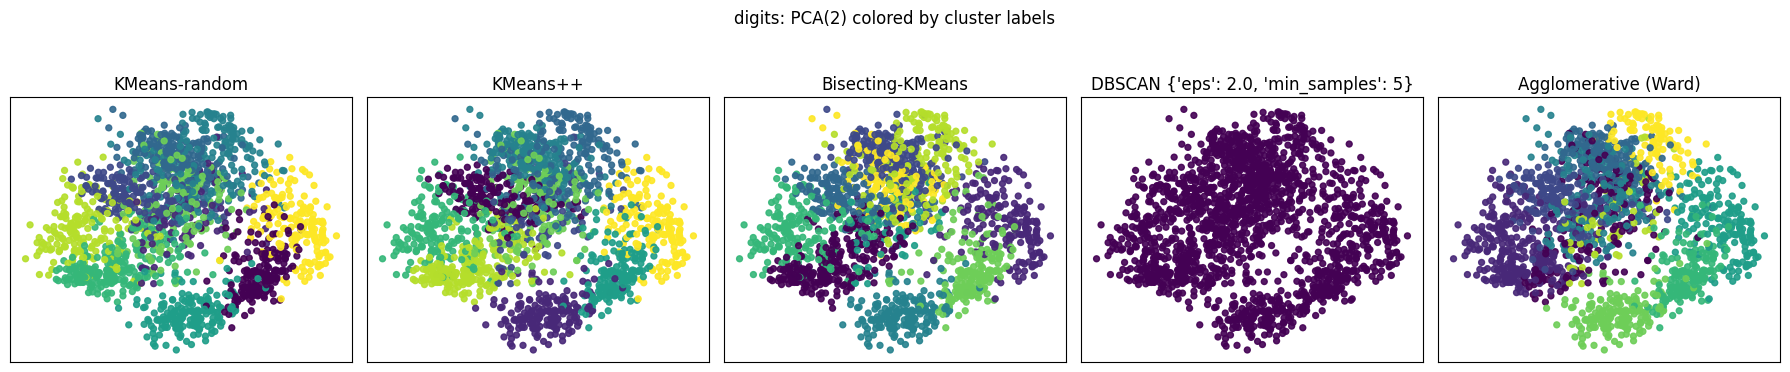


=== Combined Results (all datasets) ===


,dataset,algorithm,params,inertia,silhouette,ARI,runtime_s,iterations,dbscan_core_samples
0,iris,Agglomerative-complete,k=3,sepal length (cm) 170.461979 sepal width (...,0.513595,0.642251,0.017747,NaN,NaN
1,iris,Agglomerative-ward,k=3,sepal length (cm) 213.061817 sepal width (...,0.554324,0.731199,0.093883,NaN,NaN
2,iris,Bisecting-KMeans,k=3,sepal length (cm) 208.779579 sepal width (...,0.540521,0.680872,0.035535,7.0,NaN
3,iris,DBSCAN,"{'eps': 0.6, 'min_samples': 5}",NaN,0.538173,0.536997,0.023791,NaN,132.0
4,iris,KMeans++,k=3,78.851441,0.552819,0.730238,0.018759,4.0,NaN
5,iris,KMeans-random,k=3,78.851441,0.552819,0.730238,0.019594,6.0,NaN
6,wine,Agglomerative-complete,k=3,alcohol 4.375891e+01 m...,0.541897,0.370833,0.008641,NaN,NaN
7,wine,Agglomerative-ward,k=3,alcohol 4.597976e+01 m...,0.564480,0.368402,0.009669,NaN,NaN
8,wine,Bisecting-KMeans,k=3,alcohol 2.114775e+02 m...,0.548167,0.399222,0.036644,10.0,NaN
9,wine,DBSCAN,"{'eps': 1.2, 'min_samples': 6}",NaN,NaN,0.000000,0.018562,NaN,0.0



[Hyperparameter] K-Means on Digits (k=2..10)


,k,inertia,silhouette,ARI,runtime_s
0,2,1.914620e+06,0.118328,0.138051,0.185778
1,3,1.730182e+06,0.126495,0.220676,0.176489
2,4,1.609622e+06,0.128015,0.285825,0.176584
3,5,1.498822e+06,0.136208,0.357506,0.192791
4,6,1.415489e+06,0.150688,0.403018,0.243026
5,7,1.336480e+06,0.164026,0.500271,0.235670
6,8,1.264988e+06,0.178709,0.578083,0.295174
7,9,1.202297e+06,0.189073,0.595192,0.320997
8,10,1.165256e+06,0.182385,0.666912,0.348380


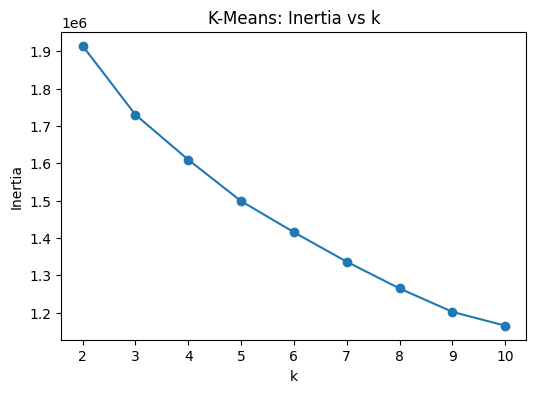

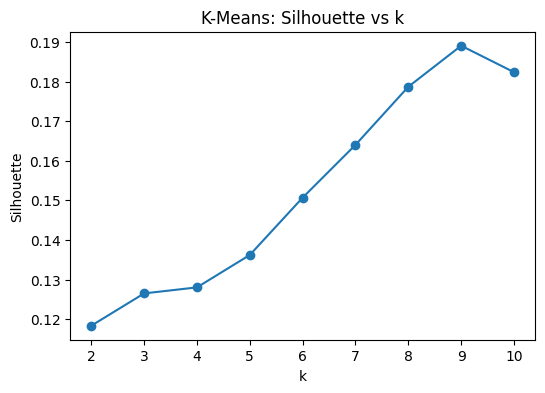


[Hyperparameter] DBSCAN on Digits (grid over eps & min_samples)


,eps,min_samples,silhouette,ARI
0,0.50,3,NaN,NaN
1,0.50,5,NaN,NaN
2,0.50,7,NaN,NaN
3,0.50,10,NaN,NaN
4,0.50,15,NaN,NaN
5,0.75,3,NaN,NaN
6,0.75,5,NaN,NaN
7,0.75,7,NaN,NaN
8,0.75,10,NaN,NaN
9,0.75,15,NaN,NaN


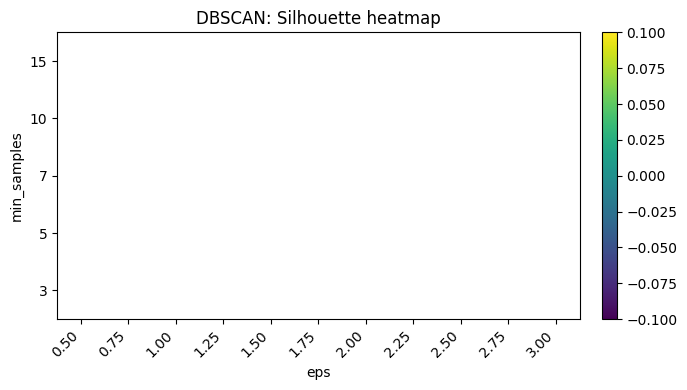

In [9]:
# === Step 2–5: Clustering implementations, evaluation, visualization ===
import numpy as np, pandas as pd, time, warnings
from dataclasses import dataclass
from typing import Dict, Tuple, Optional
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.utils.validation import check_is_fitted
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

warnings.filterwarnings("ignore", category=FutureWarning)

# ---------------------------------------------------------------------
# If you didn't define `datasets` in Step 1, this block creates them (scaled)
# ---------------------------------------------------------------------
def _autoload_if_needed():
    global datasets
    try:
        _ = datasets
    except NameError:
        from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_digits
        iris = load_iris(); wine = load_wine(); bc = load_breast_cancer(); digits = load_digits()
        scalers = { "iris": StandardScaler(), "wine": StandardScaler(),
                    "breast_cancer": StandardScaler(), "digits": StandardScaler() }
        Xy = {
            "iris": (scalers["iris"].fit_transform(iris.data), iris.target),
            "wine": (scalers["wine"].fit_transform(wine.data), wine.target),
            "breast_cancer": (scalers["breast_cancer"].fit_transform(bc.data), bc.target),
            "digits": (scalers["digits"].fit_transform(digits.data), digits.target),
        }
        datasets = Xy
        print("Loaded & scaled sklearn datasets into `datasets`.")

_autoload_if_needed()

# ---------------------------------------------------------------------
# Utility: PCA 2D projection (stable, fast; use t-SNE if you want)
# ---------------------------------------------------------------------
def pca2d(X, n_components=2, random_state=42):
    p = PCA(n_components=n_components, random_state=random_state)
    return p.fit_transform(X)

# ---------------------------------------------------------------------
# Bisecting K-Means (simple implementation):
#   - Start with 1 cluster (all points)
#   - Repeatedly split the currently largest cluster via k=2 KMeans++
#   - Stop when k clusters formed
# Returns: labels, centroids, inertia, iterations (inner KM iters), runtime
# ---------------------------------------------------------------------
@dataclass
class BisectingKMeansResult:
    labels_: np.ndarray
    cluster_centers_: np.ndarray
    inertia_: float
    n_iter_: int

def bisecting_kmeans(X, k=3, max_iter=20, n_init=5, random_state=42):
    # cluster_indices: dict {cluster_id: np.array of indices in X}
    cluster_indices = {0: np.arange(X.shape[0])}
    km_total_iters = 0
    rng = np.random.RandomState(random_state)

    while len(cluster_indices) < k:
        # pick the largest cluster to split
        cid_to_split = max(cluster_indices.keys(), key=lambda cid: len(cluster_indices[cid]))
        idx = cluster_indices[cid_to_split]
        X_sub = X.iloc[idx] # Use .iloc for row selection

        # run several KMeans(k=2) initializations on this subcluster, pick best inertia
        best = None
        for _ in range(n_init):
            km = KMeans(n_clusters=2, init='k-means++', n_init=1, max_iter=max_iter,
                        random_state=int(rng.randint(0, 1_000_000)))
            km.fit(X_sub)
            if best is None or km.inertia_ < best.inertia_:
                best = km
        km_total_iters += best.n_iter_

        # split indices into two new clusters
        left_idx = idx[best.labels_ == 0]
        right_idx = idx[best.labels_ == 1]
        # replace original cluster id with left; create a new id for right
        cluster_indices[cid_to_split] = left_idx
        new_id = max(cluster_indices.keys()) + 1
        cluster_indices[new_id] = right_idx

    # Build final labels
    labels = np.empty(X.shape[0], dtype=int)
    for new_label, cid in enumerate(sorted(cluster_indices.keys())):
        labels[cluster_indices[cid]] = new_label

    # Compute centroids & inertia consistent with KMeans
    centers = np.vstack([X.iloc[labels == j].mean(axis=0) for j in range(len(cluster_indices))]) # Use .iloc here as well
    inertia = np.sum((X.iloc[labels] - centers[labels])**2) # And here

    return BisectingKMeansResult(labels, centers, inertia, km_total_iters)

# ---------------------------------------------------------------------
# Runner for all algorithms on a dataset
# ---------------------------------------------------------------------
def run_all_algorithms(
        X: np.ndarray,
        y: Optional[np.ndarray],
        dataset_name: str,
        k_rep: Optional[int] = None,      # representative k for plots/metrics
        linkages: Tuple[str, ...] = ("ward", "complete"),
        random_state: int = 42
    ) -> pd.DataFrame:
    """
    Returns a results DataFrame with: algorithm, params, inertia, silhouette, ARI, runtime, iterations, cores(DBSCAN)
    Also produces side-by-side PCA plots for the representative k.
    """
    if k_rep is None:
        # sensible defaults
        k_rep = {"iris":3, "wine":3, "breast_cancer":2, "digits":10}.get(dataset_name, 3)

    results = []
    projections = pca2d(X, 2, random_state=random_state)

    def _record(name, params, labels, inertia, n_iter, t0, dbscan_core=None):
        sil = silhouette_score(X, labels) if len(np.unique(labels)) > 1 else np.nan
        ari = adjusted_rand_score(y, labels) if y is not None else np.nan
        results.append({
            "dataset": dataset_name,
            "algorithm": name,
            "params": params,
            "inertia": inertia if inertia is not None else np.nan,
            "silhouette": sil,
            "ARI": ari,
            "runtime_s": time.time() - t0,
            "iterations": n_iter,
            "dbscan_core_samples": dbscan_core
        })

    # ---- KMeans (random init)
    t0 = time.time()
    km_rand = KMeans(n_clusters=k_rep, init="random", n_init=10, random_state=random_state, max_iter=300)
    km_rand.fit(X)
    _record("KMeans-random", f"k={k_rep}", km_rand.labels_, km_rand.inertia_, km_rand.n_iter_, t0)

    # ---- KMeans++ init
    t0 = time.time()
    km_pp = KMeans(n_clusters=k_rep, init="k-means++", n_init=10, random_state=random_state, max_iter=300)
    km_pp.fit(X)
    _record("KMeans++", f"k={k_rep}", km_pp.labels_, km_pp.inertia_, km_pp.n_iter_, t0)

    # ---- Bisecting KMeans
    t0 = time.time()
    bkm = bisecting_kmeans(X, k=k_rep, random_state=random_state)
    _record("Bisecting-KMeans", f"k={k_rep}", bkm.labels_, bkm.inertia_, bkm.n_iter_, t0)

    # ---- DBSCAN (you can retune per dataset; here are decent start points)
    # Tip: Digits often needs larger eps due to dimensionality even after scaling.
    dbscan_params = {
        "iris": dict(eps=0.6, min_samples=5),
        "wine": dict(eps=1.2, min_samples=6),
        "breast_cancer": dict(eps=1.3, min_samples=5),
        "digits": dict(eps=2.0, min_samples=5),
    }.get(dataset_name, dict(eps=0.8, min_samples=5))

    t0 = time.time()
    db = DBSCAN(**dbscan_params, n_jobs=-1)
    labels_db = db.fit_predict(X)
    core_count = np.sum(db.core_sample_indices_.shape[0]) if hasattr(db, "core_sample_indices_") else None
    _record("DBSCAN", str(dbscan_params), labels_db, None, None, t0, dbscan_core=core_count)

    # ---- Agglomerative (Ward & Complete)
    for lk in linkages:
        # Ward requires Euclidean + numeric, and n_clusters
        t0 = time.time()
        agg = AgglomerativeClustering(n_clusters=k_rep, linkage=lk if lk != "ward" else "ward")
        labels_ag = agg.fit_predict(X)
        # Inertia not defined; approximate WCSS with cluster means for reporting (optional)
        centers = np.vstack([X.iloc[labels_ag == j].mean(axis=0) for j in range(k_rep)]) # Use .iloc here
        inertia_est = np.sum((X.iloc[labels_ag] - centers[labels_ag])**2) # And here
        _record(f"Agglomerative-{lk}", f"k={k_rep}", labels_ag, inertia_est, None, t0)

    # ---- Results table
    df = pd.DataFrame(results).sort_values(["algorithm"])
    display(df)

    # ---- Side-by-side plots (representative k/methods)
    def plot_clusters(ax, Z, labels, title):
        ax.scatter(Z[:,0], Z[:,1], c=labels, s=18, alpha=0.9)
        ax.set_title(title)
        ax.set_xticks([]); ax.set_yticks([])

    fig, axes = plt.subplots(1, 5, figsize=(18, 3.5))
    plot_clusters(axes[0], projections, km_rand.labels_, "KMeans-random")
    plot_clusters(axes[1], projections, km_pp.labels_,   "KMeans++")
    plot_clusters(axes[2], projections, bkm.labels_,     "Bisecting-KMeans")
    plot_clusters(axes[3], projections, labels_db,       f"DBSCAN {dbscan_params}")
    # Reuse Ward for the figure; we already computed both in table
    agg_ward = AgglomerativeClustering(n_clusters=k_rep, linkage="ward").fit_predict(X)
    plot_clusters(axes[4], projections, agg_ward, "Agglomerative (Ward)")
    fig.suptitle(f"{dataset_name}: PCA(2) colored by cluster labels", y=1.05)
    plt.tight_layout()
    plt.show()

    return df

# ---------------------------------------------------------------------
# 5) Hyperparameter Sensitivity
# ---------------------------------------------------------------------
def sweep_kmeans(X, y=None, k_min=2, k_max=8, random_state=42):
    rows = []
    for k in range(k_min, k_max+1):
        t0 = time.time()
        km = KMeans(n_clusters=k, init="k-means++", n_init=10, random_state=random_state)
        km.fit(X)
        sil = silhouette_score(X, km.labels_) if k > 1 else np.nan
        ari = adjusted_rand_score(y, km.labels_) if y is not None else np.nan
        rows.append({"k": k, "inertia": km.inertia_, "silhouette": sil, "ARI": ari, "runtime_s": time.time()-t0})
    df = pd.DataFrame(rows)
    display(df)
    # plots
    plt.figure(figsize=(6,4)); plt.plot(df["k"], df["inertia"], marker="o"); plt.xlabel("k"); plt.ylabel("Inertia"); plt.title("K-Means: Inertia vs k"); plt.show()
    plt.figure(figsize=(6,4)); plt.plot(df["k"], df["silhouette"], marker="o"); plt.xlabel("k"); plt.ylabel("Silhouette"); plt.title("K-Means: Silhouette vs k"); plt.show()
    return df

def sweep_dbscan(X, y=None, eps_list=None, min_samples_list=None):
    if eps_list is None: eps_list = np.linspace(0.3, 3.0, 10)
    if min_samples_list is None: min_samples_list = [3,5,7,10,15]
    records = []
    for eps in eps_list:
        for ms in min_samples_list:
            db = DBSCAN(eps=float(eps), min_samples=int(ms), n_jobs=-1)
            labels = db.fit_predict(X)
            if len(np.unique(labels)) < 2 or np.all(labels==-1):
                sil = np.nan
                ari = np.nan if y is None else np.nan
            else:
                sil = silhouette_score(X, labels)
                ari = adjusted_rand_score(y, labels) if y is not None else np.nan
            records.append({"eps": float(eps), "min_samples": int(ms), "silhouette": sil, "ARI": ari})
    df = pd.DataFrame(records)
    display(df)

    # Heatmap of silhouette
    piv = df.pivot(index="min_samples", columns="eps", values="silhouette")
    plt.figure(figsize=(7,4))
    im = plt.imshow(piv.values, aspect="auto", origin="lower")
    plt.xticks(range(len(piv.columns)), [f"{c:.2f}" for c in piv.columns], rotation=45, ha="right")
    plt.yticks(range(len(piv.index)), piv.index)
    plt.xlabel("eps"); plt.ylabel("min_samples"); plt.title("DBSCAN: Silhouette heatmap")
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.tight_layout()
    plt.show()
    return df

# ---------------------------------------------------------------------
# === RUN: Steps 2–3 for all datasets (tables + side-by-side plots) ===
# ---------------------------------------------------------------------
all_results = []
for name, (X, y) in datasets.items():
    print(f"\n=== {name.upper()} ===")
    df_res = run_all_algorithms(X, y, dataset_name=name)
    all_results.append(df_res)

summary = pd.concat(all_results, ignore_index=True)
print("\n=== Combined Results (all datasets) ===")
display(summary)

# ---------------------------------------------------------------------
# === RUN: Step 5 Hyperparameter Sensitivity (choose one dataset) ===
# Example: Digits is challenging (high-dim, non-convex)
# ---------------------------------------------------------------------
X_digits, y_digits = datasets["digits"]
print("\n[Hyperparameter] K-Means on Digits (k=2..10)")
df_k_sweep = sweep_kmeans(X_digits, y_digits, k_min=2, k_max=10)

print("\n[Hyperparameter] DBSCAN on Digits (grid over eps & min_samples)")
df_dbscan_grid = sweep_dbscan(X_digits, y_digits,
                              eps_list=np.linspace(0.5, 3.0, 11),
                              min_samples_list=[3,5,7,10,15])